# Levich and Koutechy-Levich analysis notebook for CV data.

## 1. Import needed libraries

In [1]:
from pathlib import Path
from ec4py import *
from ec4py import Quantity_Value_Unit as QV

## 2.Make a list of paths to the data files.

In [2]:
paths = []
path_to_dataSetFolder = Path(".").cwd().parent.parent / "test_data" /"CV" / "MWE" / "Capacitance"
print(path_to_dataSetFolder)
#paths.append( path_to_dataSetFolder / "CV_144913_ 3.tdms")
# paths.append( path_to_dataSetFolder / "CV_135307_ 3_MI.tdms")
#paths.append( path_to_dataSetFolder / "CV_140548_ 9_MI.tdms")
#paths.append( path_to_dataSetFolder / "CV_142109_ 8_MI.tdms")
paths.append( path_to_dataSetFolder / "CV_123313_ 1_MI")
paths.append( path_to_dataSetFolder / "CV_141031_ 3_MI.tdms")
paths.append( path_to_dataSetFolder / "CV_141010_ 3_MI.tdms")
paths=list(path_to_dataSetFolder.glob("*.tdms"))
print(paths)
[print(x) for x in paths]



c:\Users\gustav.wiberg\Documents\GitHub\NordicEC\EC4py\test_data\CV\MWE\Capacitance
[WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123313_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123315_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123317_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123319_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123321_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123323_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123325_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/

[None, None, None, None, None, None, None, None, None, None]

## 3. Load in the data files

c:\Users\gustav.wiberg\Documents\GitHub\NordicEC\EC4py\test_data\CV\MWE\Capacitance\CV_123313_ 1_MI.tdms


(<matplotlib.lines.Line2D at 0x169161ce550>,
 <Axes: xlabel='Voltage (V)', ylabel='Current (A)'>)

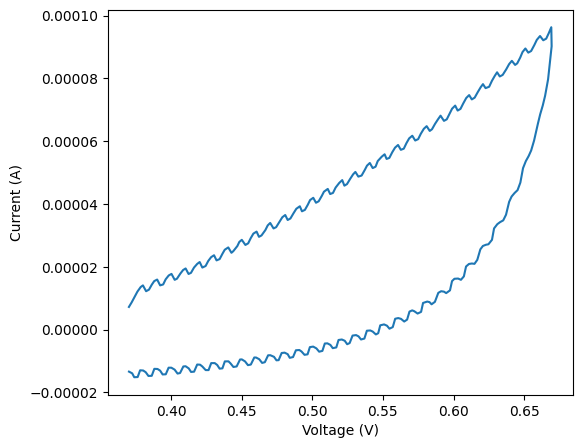

In [3]:
print(paths[0])
EC_Data(paths[0]).plot("E","i_3")

[<ec4py.util.Quantity_Value_Unit object at 0x000001691628BB90>, <ec4py.util.Quantity_Value_Unit object at 0x00000169158778D0>, <ec4py.util.Quantity_Value_Unit object at 0x00000169194565D0>, <ec4py.util.Quantity_Value_Unit object at 0x0000016919457AD0>, <ec4py.util.Quantity_Value_Unit object at 0x00000169194579D0>, <ec4py.util.Quantity_Value_Unit object at 0x0000016919456250>, <ec4py.util.Quantity_Value_Unit object at 0x0000016919457850>, <ec4py.util.Quantity_Value_Unit object at 0x00000169194576D0>, <ec4py.util.Quantity_Value_Unit object at 0x0000016919457950>, <ec4py.util.Quantity_Value_Unit object at 0x0000016919457750>]


C:\Users\gustav.wiberg\Documents\GitHub\NordicEC\EC4py\src\ec4py\cv_datas.py:232: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  CV_plot.legend()


<Axes: xlabel='E vs RHE (V)', ylabel='i v$^{-1}$ (A V$^{-1}$ s)'>

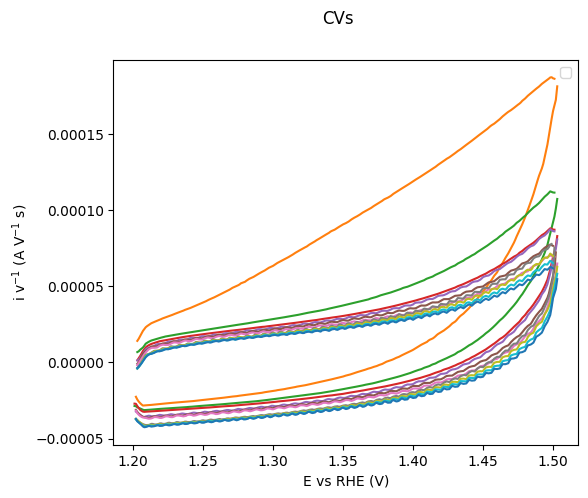

In [4]:
a=CV_Datas(paths,"i_3",y_smooth=5)
print(a.rate)
a.plot(RHE,RATE, LEGEND=RATE)

None
None


(<matplotlib.lines.Line2D at 0x1691b617d90>,
 <Axes: xlabel='E vs Ag/AgCl (V)', ylabel='i$_{+}$ v$^{-1}$ (A V$^{-1}$ s)'>)

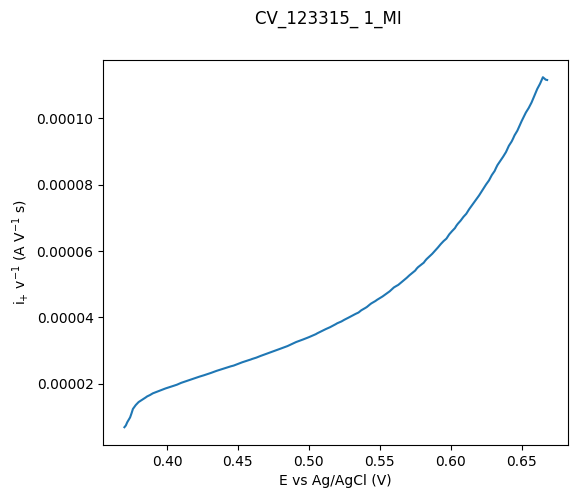

In [5]:
b=a[1].get_sweep(POS)
print(b.norm(RATE))
print(b.norm(POS))
b.plot(POS)

In [6]:
k,i=a.get_i_at_E(0.5,RHE)
print(i)

[<ec4py.util.Quantity_Value_Unit object at 0x000001691B5F29D0>, <ec4py.util.Quantity_Value_Unit object at 0x00000169194CE990>, <ec4py.util.Quantity_Value_Unit object at 0x000001691B6457D0>, <ec4py.util.Quantity_Value_Unit object at 0x000001691B631CD0>, <ec4py.util.Quantity_Value_Unit object at 0x000001691B630190>, <ec4py.util.Quantity_Value_Unit object at 0x0000016915875E50>, <ec4py.util.Quantity_Value_Unit object at 0x000001691B62BE50>, <ec4py.util.Quantity_Value_Unit object at 0x000001691B620350>, <ec4py.util.Quantity_Value_Unit object at 0x000001691B620B10>, <ec4py.util.Quantity_Value_Unit object at 0x000001691B621B50>]


(<matplotlib.lines.Line2D at 0x1691b659dd0>,
 <Axes: xlabel='E vs RHE (V)', ylabel='i$_{-}$ (A)'>)

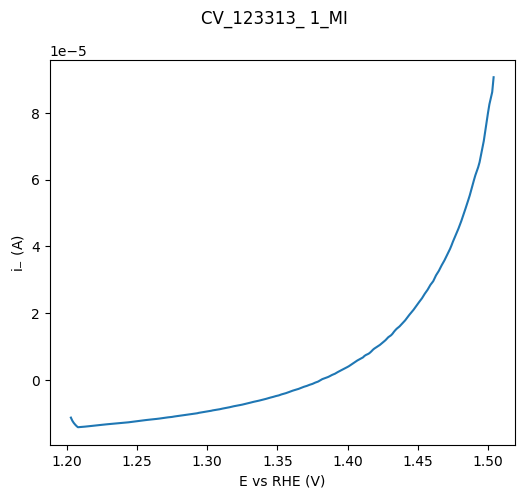

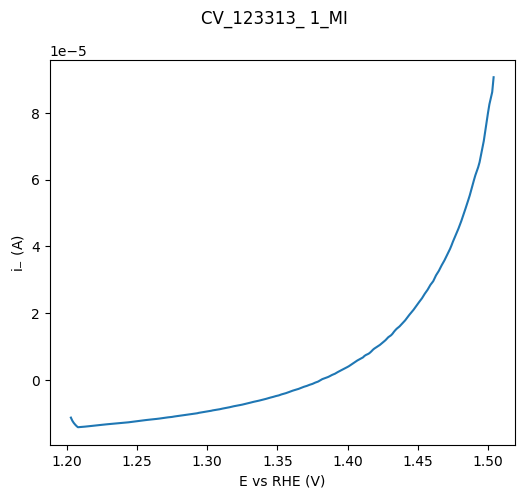

In [7]:
a[0].plot(RHE,NEG, RHE)
b=a[0].get_sweep(NEG)
b.plot(RHE)

In [8]:
op={"dir":"all"}
op["dir"]
print(a[0]._direction("ALL","BAD","AAA",NEG))

neg


Sweep Rate analysis
dir 	pos      	neg     
 :     	C 	C
slope: 	9.46e-05 	3.43e-06


C:\Users\gustav.wiberg\Documents\GitHub\NordicEC\EC4py\src\ec4py\cv_datas.py:232: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  CV_plot.legend()


(<ec4py.util.Quantity_Value_Unit at 0x1691bac7f10>,
 <ec4py.util.Quantity_Value_Unit at 0x1691b82a6d0>)

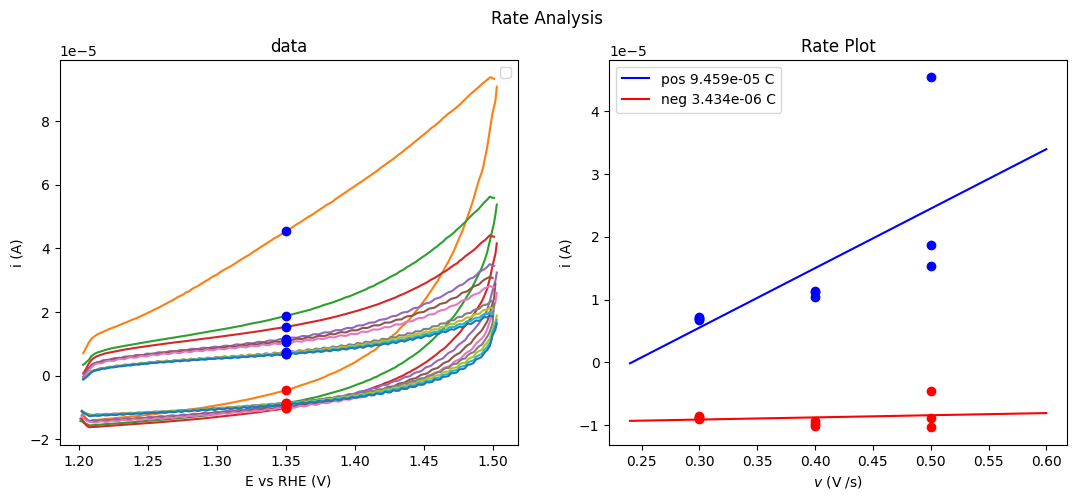

In [13]:
a.RateAnalysis(1.35, RHE)

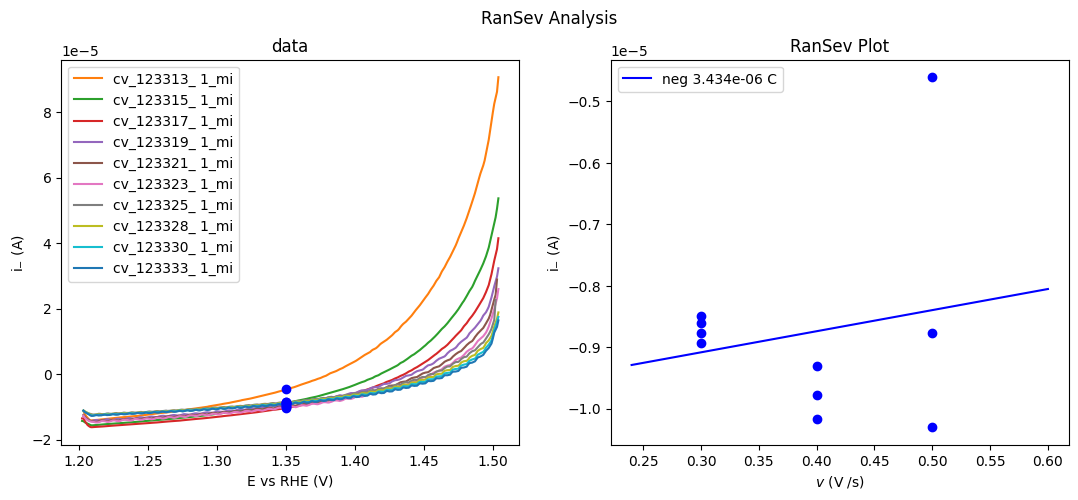

In [10]:
a.RanSev(1.35,NEG,RHE)

<Axes: xlabel='E vs Ag/AgCl (V)', ylabel='( i$_{+}$ - i$_{-}$ ) v$^{-1}$ (A V$^{-1}$ s)'>

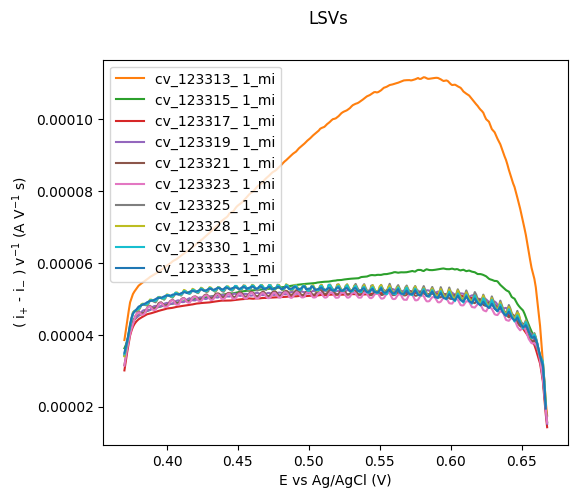

In [11]:
b=a.get_sweep("dif")
b.plot(RATE)
